# **Imports**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from mlxtend.plotting import plot_decision_regions

import __main__

# **Load Dataset**

(1000, 2) (1000,)


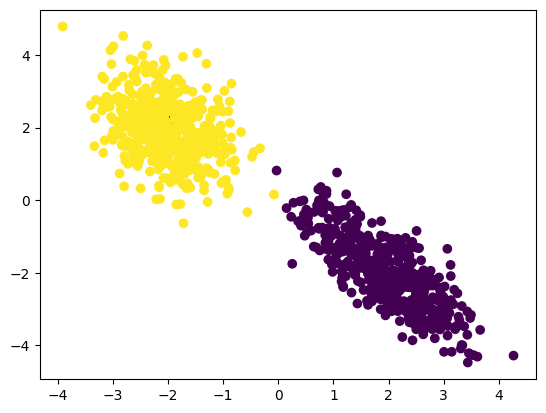

In [ ]:
X, y = make_classification(n_samples=1000, n_features=2,
                           n_redundant=0, n_clusters_per_class=1, class_sep=2.0,
                           n_classes=2, random_state=27)
print(X.shape, y.shape)

plt.scatter(X[:, 0], X[:, 1], c=y)

### Train-Test Split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

# **OOP Style**

In [ ]:
model = LogisticRegression(penalty='none')
model.fit(x_train, y_train)
model.predict(x_test)
model.score(x_test, y_test)

1.0

In [ ]:
model.intercept_, model.coef_

(array([-0.27505247]), array([[-3.06552241,  0.32327069]]))

# OOP Style

In [ ]:
class ModelName:

    def __init__(self, penalty, ...):
        pass

    def fit(self, x, y):
        pass

    def predict(self, x):
        pass

    def score(self, x, y):
        pass

# **Neuron (from Scratch)**

## Activation Function

In [ ]:
def relu(x):
    return np.maximum(0, x)

In [ ]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [ ]:
def tanh(x):
    pass

## Loss

In [ ]:
def bce(y, y_hat):
    return np.mean(-(y*np.log(y_hat) + (1-y)*np.log(1-y_hat)))

In [ ]:
def mse(y, y_hat):
    return np.mean((y - y_hat)**2)

## Accuracy

In [ ]:
def accuracy(y, y_hat, t=0.5):
    y_hat = np.where(y_hat<t, 0, 1)
    acc = np.sum(y == y_hat) / len(y)
    return acc

## Neuron

In [ ]:
class Neuron:

    def __init__(self, in_features, af=None, loss_fn=mse, n_iter=100, eta=0.1, verbose=True):
        self.in_features = in_features
        # weight & bias
        self.w = np.random.randn(in_features, 1)
        self.b = np.random.randn()
        self.af = af
        self.loss_fn = loss_fn
        self.loss_hist = []
        self.w_grad, self.b_grad = None, None
        self.n_iter = n_iter
        self.eta = eta
        self.verbose = verbose

    def predict(self, x):
        # x: [n_samples, in_features]
        y_hat = x @ self.w + self.b
        y_hat = y_hat if self.af is None else self.af(y_hat)
        return y_hat

    def fit(self, x, y):
        for i in range(self.n_iter):
            y_hat = self.predict(x)
            loss = self.loss_fn(y, y_hat)
            self.loss_hist.append(loss)
            self.gradient(x, y, y_hat)
            self.gradient_descent()
            if self.verbose & (i % 10 == 0):
                print(f'Iter={i}, Loss={loss:.4}')

    def gradient(self, x, y, y_hat):
        self.w_grad = (x.T @ (y_hat - y)) / len(y)
        self.b_grad = (y_hat - y).mean()

    def gradient_descent(self):
        self.w -= self.eta * self.w_grad
        self.b -= self.eta * self.b_grad

    def __repr__(self):
        return f'Neuron({self.in_features}, {self.af.__name__})'

    def parameters(self):
        return {'w': self.w, 'b': self.b}

In [ ]:
neuron = Neuron(in_features=2, af=sigmoid)
neuron.predict(X)
print(neuron)
print(neuron.parameters())

Neuron(2, sigmoid)
{'w': array([[ 0.29178832],
       [-0.0512595 ]]), 'b': 0.7437694504369816}


In [ ]:
neuron.fit(x_train, y_train[:, None])
neuron.parameters()

Iter=0, Loss=0.4362
Iter=10, Loss=0.0495
Iter=20, Loss=0.0275
Iter=30, Loss=0.02084
Iter=40, Loss=0.01755
Iter=50, Loss=0.01556
Iter=60, Loss=0.01419
Iter=70, Loss=0.01319
Iter=80, Loss=0.01241
Iter=90, Loss=0.01179


{'w': array([[-1.08297203],
        [ 1.1343178 ]]),
 'b': 0.3470325425088299}

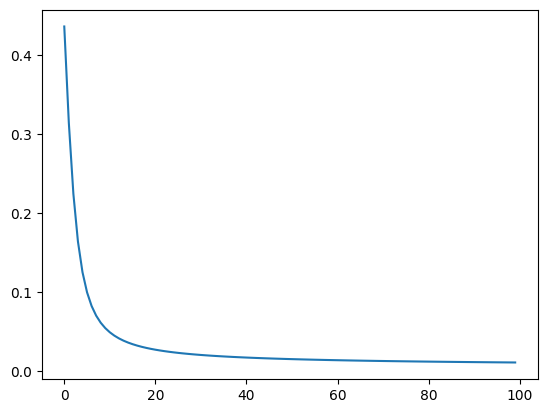

In [ ]:
plt.plot(neuron.loss_hist)

## Train

In [ ]:
neuron = Neuron(2, af=sigmoid, loss_fn=bce, n_iter=500)
neuron.fit(X, y[:, None])

Iter=0, Loss=0.1246
Iter=10, Loss=0.1046
Iter=20, Loss=0.09236
Iter=30, Loss=0.0841
Iter=40, Loss=0.07812
Iter=50, Loss=0.07358
Iter=60, Loss=0.06999
Iter=70, Loss=0.0671
Iter=80, Loss=0.0647
Iter=90, Loss=0.06268
Iter=100, Loss=0.06095
Iter=110, Loss=0.05946
Iter=120, Loss=0.05815
Iter=130, Loss=0.057
Iter=140, Loss=0.05597
Iter=150, Loss=0.05505
Iter=160, Loss=0.05422
Iter=170, Loss=0.05347
Iter=180, Loss=0.05279
Iter=190, Loss=0.05216
Iter=200, Loss=0.05159
Iter=210, Loss=0.05106
Iter=220, Loss=0.05057
Iter=230, Loss=0.05011
Iter=240, Loss=0.04969
Iter=250, Loss=0.04929
Iter=260, Loss=0.04892
Iter=270, Loss=0.04857
Iter=280, Loss=0.04824
Iter=290, Loss=0.04793
Iter=300, Loss=0.04764
Iter=310, Loss=0.04737
Iter=320, Loss=0.04711
Iter=330, Loss=0.04686
Iter=340, Loss=0.04662
Iter=350, Loss=0.0464
Iter=360, Loss=0.04618
Iter=370, Loss=0.04598
Iter=380, Loss=0.04578
Iter=390, Loss=0.0456
Iter=400, Loss=0.04542
Iter=410, Loss=0.04525
Iter=420, Loss=0.04508
Iter=430, Loss=0.04492
Iter=440

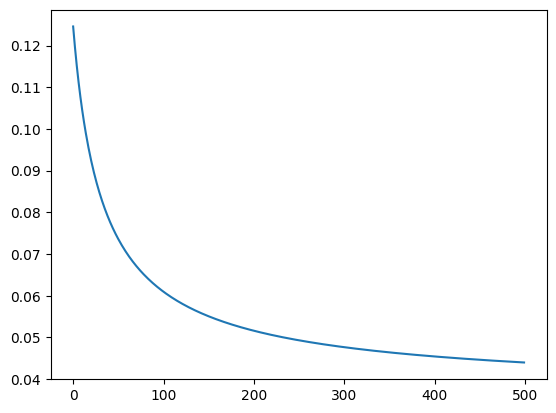

In [ ]:
plt.plot(neuron.loss_hist)

## Evaluation

In [ ]:
y_hat = neuron.predict(x_test)
accuracy(y_test[:, None], y_hat, t=0.5)

1.0

In [ ]:
y_hat[:, 0], y_test

(array([7.63763959e-03, 9.99826810e-01, 2.36177640e-06, 9.74818094e-01,
        3.85976971e-03, 6.02038032e-05, 2.60070029e-05, 9.91744690e-01,
        9.59263068e-01, 5.16361390e-04, 9.92327738e-01, 9.99964855e-01,
        9.99714479e-01, 9.93008139e-01, 9.84115996e-01, 9.99477560e-01,
        6.50648466e-03, 9.94067655e-01, 1.21473659e-05, 9.99717865e-01,
        2.17783317e-04, 1.30436365e-05, 7.74469696e-01, 9.96998745e-01,
        2.51148419e-02, 9.99617212e-01, 9.88831945e-01, 2.85163969e-04,
        9.97466388e-01, 3.21454066e-05, 1.29513907e-05, 2.99432074e-01,
        9.98026081e-01, 9.91567824e-01, 2.05525075e-05, 4.18275030e-03,
        9.96958179e-01, 2.55382646e-04, 1.85003445e-03, 9.88837049e-01,
        1.41880628e-05, 8.43449642e-01, 2.22418126e-03, 1.93212675e-03,
        3.23216248e-03, 9.98093668e-01, 9.99393253e-01, 5.01135052e-02,
        9.87622032e-01, 9.99969479e-01, 9.87584746e-01, 1.67977586e-03,
        9.99453619e-01, 1.29682830e-02, 4.78006422e-03, 9.882791

## Plot

<AxesSubplot: >

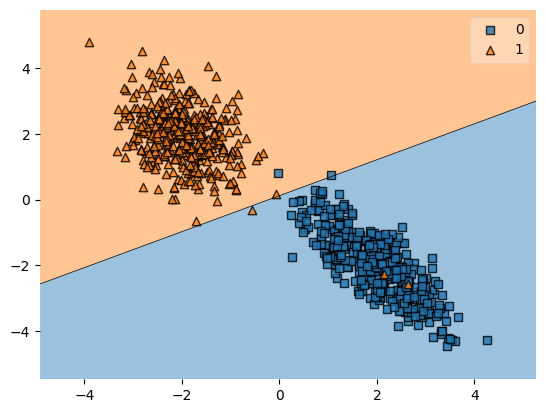

In [ ]:
plot_decision_regions(x_train, y_train, clf=neuron)